In [100]:
# import the necessary packages
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.color import rgb2lab
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt
import argparse
import cv2
import numpy as np


In [101]:
def abstract(i):  
    
    # construct the argument parser and parse the arguments
    # ap = argparse.ArgumentParser()
    # ap.add_argument("-i", "--image", required = True, help = "Path to the image")
    # args = vars(ap.parse_args())

    # load the image and convert it to a floating point data type
    #image = cv2.imread('flower.jpg')
    image=i
    image_norm=img_as_float(image)
    lab = rgb2lab(image_norm)
    lab_norm=(lab + np.array([0, 128, 128])) / np.array([100, 255, 255])
    #image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
    # loop over the number of segments
    segments = slic(image_norm, n_segments = 600, compactness=10, sigma = 1,multichannel=True, convert2lab=True)
    #segments = slic(image, n_segments=self.__n_segments,enforce_connectivity=True, compactness=30.0,convert2lab=False)

    # show the output of SLIC

    plt.imshow(mark_boundaries(image, segments))
    plt.savefig('segment.jpg')
    plt.show()
    n_segments = segments.max() + 1

    # construct position matrix
    max_y, max_x = np.array(segments.shape) - 1
    x = np.linspace(0, max_x, image.shape[1]) / max_x
    y = np.linspace(0, max_y, image.shape[0]) / max_y
    position = np.dstack((np.meshgrid(x, y)))

    # mean_lab = np.zeros((n_segments, 3))
    # mean_rgb = np.zeros((n_segments, 3))
    # mean_position = np.zeros((n_segments, 2))
    # for superpixel in np.unique(superpixels):
    #     mask = superpixels == superpixel
    #     mean_lab[superpixel, :] = nlab[mask, :].mean(axis=0)
    #     mean_rgb[superpixel, :] = nrgb[mask, :].mean(axis=0)
    #     mean_position[superpixel, :] = position[mask, :].mean(axis=0)
    mean_colors = np.zeros((n_segments, 3))
    mean_position = np.zeros((n_segments, 2))
    clrs=np.zeros((n_segments, 3))
    for i in np.unique(segments):
        mask = segments == i
        mean_colors[i,:]=lab[mask,:].mean(axis=0)
        mean_position[i, :] = position[mask, :].mean(axis=0)

    mean_position
    mean_colors
    d_abstract={}
#     for j in range (mean_position.shape[0]):
#         d_abstract[j]=[]

#     for k in range (mean_position.shape[0]):

#         d_abstract[k].append([[mean_position[i]],[mean_colors[i]]])

    d={}
    d1={}
    d_abst={}
    d_uniqueness={}
    r,c=segments.shape
    for i in range (r):
        for j in range (c):
            d[segments[i,j]]=[]
            d_uniqueness[segments[i,j]]=[]
            d1[segments[i,j]]=[]


    for i in range (r):
        for j in range (c):
            d[segments[i,j]].append([i,j])
            d1[segments[i,j]].append(image_norm[i,j])

    image_copy=np.copy(image_norm)
    
    for i in range (r):
        for j in range (c):
            image_copy[i,j]= np.median(d1[segments[i,j]],axis=0)
            d_uniqueness[segments[i,j]].append([image_copy[i,j]])
            
            
    output=(image_copy*255).astype('uint8')
    for i in d_uniqueness.keys():
        
        clrs[i]=d_uniqueness[i][0][0]

    
    return clrs,mean_position,segments,d,output,d_uniqueness

    

    


In [102]:
# def abstract(i):  
    
#     # construct the argument parser and parse the arguments
#     # ap = argparse.ArgumentParser()
#     # ap.add_argument("-i", "--image", required = True, help = "Path to the image")
#     # args = vars(ap.parse_args())

#     # load the image and convert it to a floating point data type
#     #image = cv2.imread('flower.jpg')
#     image=i
#     image_norm=img_as_float(image)
#     lab = rgb2lab(image_norm)
#     lab_norm=(lab + np.array([0, 128, 128])) / np.array([100, 255, 255])
#     #image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
#     # loop over the number of segments
#     #segments = slic(image_norm, n_segments = 600, compactness=10, sigma = 1,multichannel=True, convert2lab=True)
#     segments = slic(image_norm, n_segments=600, compactness=15.0, convert2lab=True, multichannel=True,sigma = 1)

#     # show the output of SLIC

#     plt.imshow(mark_boundaries(image, segments))
#     plt.savefig('segment.jpg')
#     plt.show()
#     n_segments = segments.max() + 1

#     # construct position matrix
#     max_y, max_x = np.array(segments.shape) - 1
#     x = np.linspace(0, max_x, image.shape[1]) / max_x
#     y = np.linspace(0, max_y, image.shape[0]) / max_y
#     position = np.dstack((np.meshgrid(x, y)))

#     # mean_lab = np.zeros((n_segments, 3))
#     # mean_rgb = np.zeros((n_segments, 3))
#     # mean_position = np.zeros((n_segments, 2))
#     # for superpixel in np.unique(superpixels):
#     #     mask = superpixels == superpixel
#     #     mean_lab[superpixel, :] = nlab[mask, :].mean(axis=0)
#     #     mean_rgb[superpixel, :] = nrgb[mask, :].mean(axis=0)
#     #     mean_position[superpixel, :] = position[mask, :].mean(axis=0)
#     mean_colors_rgb = np.zeros((n_segments, 3))
#     mean_colors_lab = np.zeros((n_segments, 3))
#     mean_position = np.zeros((n_segments, 2))
#     clrs=np.zeros((n_segments, 3))
#     for i in np.unique(segments):
#         mask = segments == i
#         mean_colors_lab[i,:]=lab_norm[mask,:].mean(axis=0)
#         mean_colors_rgb[i,:]=image_norm[mask,:].mean(axis=0)
        
#         mean_position[i, :] = position[mask, :].mean(axis=0)

#     d_abstract={}
# #     for j in range (mean_position.shape[0]):
# #         d_abstract[j]=[]

# #     for k in range (mean_position.shape[0]):

# #         d_abstract[k].append([[mean_position[i]],[mean_colors[i]]])

#     d={}
#     d1={}
#     d_abst={}
#     d_uniqueness={}
#     r,c=segments.shape
#     for i in range (r):
#         for j in range (c):
#             d[segments[i,j]]=[]
#             d_uniqueness[segments[i,j]]=[]
#             d1[segments[i,j]]=[]


#     for i in range (r):
#         for j in range (c):
#             d[segments[i,j]].append([i,j])
#             d1[segments[i,j]].append(image_norm[i,j])

#     image_copy=np.copy(image_norm)
    
#     for i in range (r):
#         for j in range (c):
#             image_copy[i,j]= np.median(d1[segments[i,j]],axis=0)
#             d_uniqueness[segments[i,j]].append([image_copy[i,j]])
            
            
#     output=(image_copy*255).astype('uint8')
#     for i in d_uniqueness.keys():
        
#         clrs[i]=d_uniqueness[i][0][0]

    
#     return mean_colors_rgb,mean_colors_lab,mean_position,segments,output,d_uniqueness,d
    


In [103]:
# d={}
# d_abst={}
# d_uniqueness={}
# r,c=segments.shape
# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]]=[]
#         d_uniqueness[segments[i,j]]=[]
#         d_abst[segments[i,j]]=[]
        

# for i in range (r):
#     for j in range (c):
#         d[segments[i,j]].append([i,j])
        
# len(d)

In [104]:
# import numpy as np
#image_copy=np.copy(image_norm)
# for i in range (r):
#     for j in range (c):
#         image_copy[i,j]= np.median(d[segments[i,j]],axis=0)
#         d_uniqueness[segments[i,j]].append([[i,j] ,[image_copy[i,j]]])
# cv2.imwrite('image_copy.jpg',(image_copy * 255).astype('uint8'))


C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\Users\ASHISH\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[s

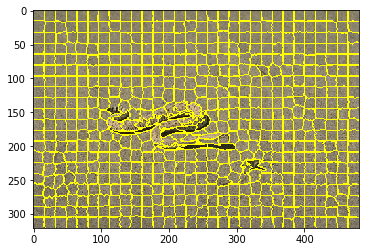

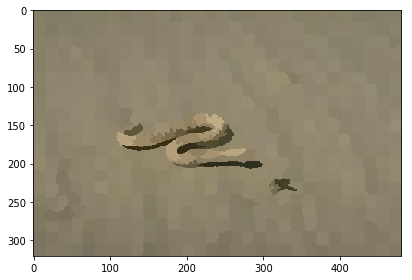

In [109]:
from skimage import io
image=io.imread('vipercolor.jpg')
image_uniqueness=np.zeros((image.shape[0],image.shape[1],3))
image_distribution=np.zeros((image.shape[0],image.shape[1],3))

colors=[]
positions=[]
colors,positions,seg,d_p,o,d_u = abstract(image)
io.imshow(o)
io.show()


In [110]:
# from skimage import io
# image=io.imread('.\input_data\moose.jpg')
# image_uniqueness=np.zeros((image.shape[0],image.shape[1],3))
# image_distribution=np.zeros((image.shape[0],image.shape[1],3))

# rgbcolors=[]
# labcolors=[]
# positions=[]
# rgbcolors,labcolors,positions,seg,o,d_u,d_p= abstract(image)
# io.imshow(o)
# io.show()
# #d_u


In [111]:
sigmap = 0.25
sigmac = 20

def giveSSD(x1,x2):
    return np.sqrt(np.sum(np.square(x1-x2)))

def wp(pi,pj):
    
    return np.exp((-1/2*(sigmap**2))*np.square(giveSSD(pi,pj)))

def wc(ci,cj):
    
    return np.exp((-1/2*(sigmac**2))*np.square(giveSSD(ci,cj)))

def uniquenessAssignment(c,p):
    U = np.empty(len(c))
    for i in range(len(c)):
        Zi=0
        pi = p[i]
        ci = c[i]
        tUniq = 0;
        
        for j in range(len(c)):
            #if i != j:
            pj = p[j] 
            cj=c[j]
            Zi+= wp(pi,pj)

        
        for j in range(len(c)):
            #if i != j:
            pj = p[j] 
            cj=c[j]
            tUniq += np.square(giveSSD(ci,cj))*(1/Zi)*wp(pi,pj)    

        U[i] = tUniq
    
    return U

def distributionAssignment(c,p):
    D = np.zeros(len(c))
    
    
    for i in range(len(c)):
        Zi=0    
        meani = 0
        tDist = 0
    
        ci = c[i]
        pi = p[i]
        
        for j in range(len(c)):
            cj = c[j] 
            Zi+= wc(ci,cj)
        
        for j in range(len(c)):
            cj = c[j] 
            pj = p[j]
            #if (i != j):
            meani += (1/Zi) * wc(ci,cj)*pj
        
        
        for j in range(len(c)):
            cj = c[j] 
            pj = p[j]
            tDist += np.square(giveSSD(pj,meani))*(1/Zi)*wc(ci,cj)
            
        D[i] = tDist
        
        
    return D
def saliency_Assignment(U_norm,dist_norm,colors,positions):
    k=3
    Si = np.ones(len(colors))
    S=np.ones(len(colors))
    Si = U_norm* np.exp(-k*dist_norm);
    for i in range(len(colors)):
        Zi=0
        pi = positions[i]
        ci = colors[i]
        tUniq = 0;

        for j in range(len(colors)):
            #if i != j:
            pj = positions[j] 
            cj = colors[j]
            Zi+=np.exp((-1/2*(1/10))*np.square(giveSSD(ci,cj)))*np.exp((-1/2*(1/30))*np.square(giveSSD(pi,pj)))


        for j in range(len(colors)):
            #if i != j:
            pj = positions[j] 
            cj = colors[j]
            tUniq +=(1/Zi)*np.exp((-1/2*(1/10))*np.square(giveSSD(ci,cj)))*np.exp((-1/2*(1/30))*np.square(giveSSD(pi,pj)))*Si[i] 

        S[i] = tUniq

    image_sal=np.zeros((image.shape[0],image.shape[1],3))

    for i in range(len(d_p)):

        for k in range(len(d_p[i])):

            row=d_p[i][k][0]
            col=d_p[i][k][1]
            image_sal[row,col]=S[i]
    return image_sal




In [112]:
# # sigmap = 1
# # sigmac = 5

# def giveSSD(x1,x2):
#     return np.sqrt(np.sum(np.square(x1-x2)))

# def wp(pi,pj,varp):
#     sigmap=np.sqrt(varp)
#     return np.exp((-1/2*(sigmap**2))*np.square(giveSSD(pi,pj)))

# def wc(ci,cj,varc):
#     sigmac=np.sqrt(varc)
#     return np.exp((-1/2*(sigmac**2))*np.square(giveSSD(ci,cj)))

# def uniquenessAssignment(c,p):
#     U = np.empty(len(c))
#     for i in range(len(c)):
#         Zi=0
#         pi = p[i]
#         ci = c[i]
#         tUniq = 0;
        
#         for j in range(len(c)):
#             #if i != j:
#             pj = p[j] 
#             cj=c[j]
#             varp=np.var(pj)
#             Zi+= wp(pi,pj,varp)

        
#         for j in range(len(c)):
#             #if i != j:
#             pj = p[j] 
#             cj=c[j]
#             varp=np.var(pj)
#             tUniq += np.square(giveSSD(ci,cj))*(1/Zi)*wp(pi,pj,varp)    

#         U[i] = tUniq
    
#     return U

# def distributionAssignment(c,p):
#     D = np.zeros(len(c))
    
    
#     for i in range(len(c)):
#         Zi=0    
#         meani = 0
#         tDist = 0
    
#         ci = c[i]
#         pi = p[i]
        
#         for j in range(len(c)):
#             cj = c[j] 
#             varc=max(np.var(cj),np.var(ci))
#             Zi+= wc(ci,cj,varc)
        
#         for j in range(len(c)):
#             cj = c[j] 
#             pj = p[j]
#             varc=max(np.var(cj),np.var(ci))
#             #if (i != j):
#             meani += (1/Zi) * wc(ci,cj,varc)*pj
        
        
#         for j in range(len(c)):
#             cj = c[j] 
#             pj = p[j]
#             varc=max(np.var(cj),np.var(ci))
#             tDist += np.square(giveSSD(pj,meani))*(1/Zi)*wc(ci,cj,varc)
            
#         D[i] = tDist
        
        
#     return D


In [113]:
Uniqueness=uniquenessAssignment(colors,positions)
U_norm=Uniqueness/max(Uniqueness)

In [114]:
dist=distributionAssignment(colors,positions)
dist.shape
dist_norm=dist/max(dist)

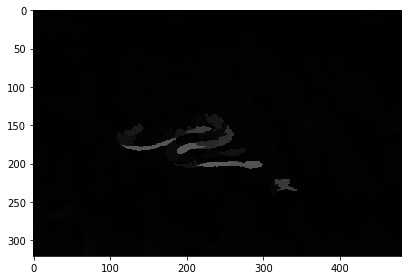

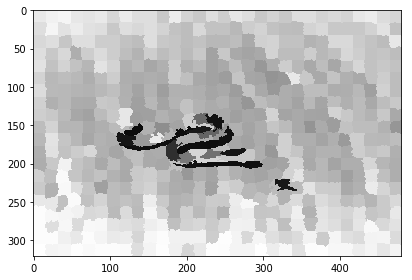

True

In [115]:
im_test=[]

for i in range(len(d_p)):
    for k in range(len(d_p[i])):
        
        row=d_p[i][k][0]
        col=d_p[i][k][1]
        image_uniqueness[row,col]=Uniqueness[i]
        image_distribution[row,col]=dist_norm[i]
io.imshow(image_uniqueness,cmap='gray')
io.show()
io.imshow(image_distribution,cmap='gray')
io.show()
cv2.imwrite('dis.jpg',image_distribution*255)
cv2.imwrite('un.jpg',image_uniqueness*255)

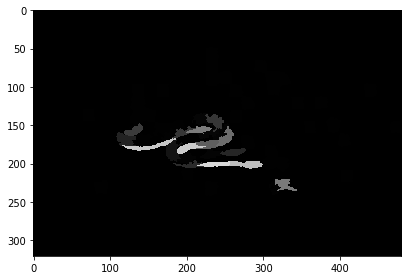

In [116]:
image_sal=saliency_Assignment(U_norm,dist_norm,colors,positions)    
cv2.imwrite('saliency_op_fb.jpg',image_sal*255)
io.imshow(image_sal)

In [117]:
# k=6
# Si = np.zeros(len(colors))
# S=np.zeros(len(colors))
# Si = U_norm* np.exp(-k*dist_norm);
# alpha=1/30
# beta=1/30
# weight = np.exp(-0.5 * (alpha * cdist(colors, colors) ** 2 +
#                                 beta * cdist(positions, positions) ** 2))
# weight /= weight.sum(axis=1)[:, None]
# S=np.dot(weight, Si)
# S=S/max(S)*255
# image_sal=np.zeros((image.shape[0],image.shape[1],3))
        
# for i in range(len(d_p)):
    
#     for k in range(len(d_p[i])):
        
#         row=d_p[i][k][0]
#         col=d_p[i][k][1]
#         image_sal[row,col]=S[i]

        

    


In [118]:
###### max(1,2)